In [1]:
#Recurrent Neural Network for Voice Activity Detection
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import scipy.io.wavfile as sio
import scipy as sp
import matplotlib.pyplot as plt
from utils import vectorize
from utils import vectorize_teensy
import csv
tf.enable_eager_execution()

import numpy as np
import time

# Training

In [2]:
#Input data and labels

##EXAMPLE 1
#AUDIO DATA
rate1 , audio1 = sio.read('data/audio/track1.wav')
rate2 , audio2 = sio.read('data/audio/track2.wav')
rate3 , audio3 = sio.read('data/audio/track3.wav')
rate4, audio4 = sio.read('data/audio/track4.wav')


label1 = np.load('data/audio/track1_label.npy')
label2 = np.load('data/audio/track2_label.npy')
label3 = np.load('data/audio/track3_label.npy')
label4 = np.load('data/audio/track4_label.npy')


#Each audio sample here is sampled at 16000hz, so they can all be combined into 1 long sample
rate = rate1
audio = np.hstack((audio1,audio2,audio4))
labels = np.hstack((label1,label2,label4))

#Use vectorize function to fft, bin,average, and group data together
data, labels = vectorize(audio,rate,1/40,group_size = 3,full = False, training = True,labels = labels, serial = False)
val_data, val_labels = vectorize(audio3,rate3,1/40,group_size=3,full=False,training=True,labels=label3,serial = False)

#reshape data to fit into RNN
data = data.reshape(data.shape[0],data.shape[1],1)
val_data = val_data.reshape(val_data.shape[0],val_data.shape[1],1)

print(data.shape)
print(labels.shape)
print(val_data.shape)
print(val_labels.shape)

(1664, 24, 1)
(1664, 1)
(212, 24, 1)
(212, 1)


In [5]:
#Define model,compile, train, and save_weights

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM((1), return_sequences = False)
 
])

#compile model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])

#train model
history = model.fit(data, labels, epochs=50,validation_data = (val_data,val_labels))

# Save weights
model.save_weights('./weights/my_model')

Train on 1664 samples, validate on 212 samples
Epoch 1/50
1664/1664 [==============================] - 1s 584us/sample - loss: 0.3367 - acc: 0.6635 - val_loss: 0.3365 - val_acc: 0.6604
Epoch 2/50
1664/1664 [==============================] - 1s 317us/sample - loss: 0.3362 - acc: 0.6635 - val_loss: 0.3352 - val_acc: 0.6604
Epoch 3/50
1664/1664 [==============================] - 1s 318us/sample - loss: 0.3365 - acc: 0.6635 - val_loss: 0.3337 - val_acc: 0.6604
Epoch 4/50
1664/1664 [==============================] - 1s 321us/sample - loss: 0.3362 - acc: 0.6635 - val_loss: 0.3355 - val_acc: 0.6604
Epoch 5/50
1664/1664 [==============================] - 1s 317us/sample - loss: 0.3359 - acc: 0.6635 - val_loss: 0.3348 - val_acc: 0.6604
Epoch 6/50
1664/1664 [==============================] - 1s 320us/sample - loss: 0.3357 - acc: 0.6635 - val_loss: 0.3309 - val_acc: 0.6604
Epoch 7/50
1664/1664 [==============================] - 1s 325us/sample - loss: 0.3357 - acc: 0.6635 - val_loss: 0.3348 - val

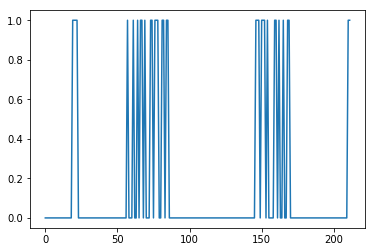

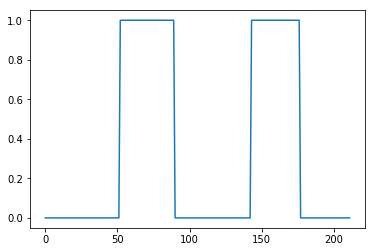

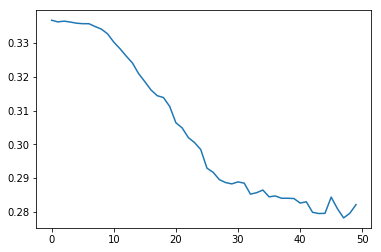

In [7]:
#Evaluate Training
results = model.predict(val_data)
#print(results[0:10])
#print(val_labels[0:10])

plt.plot(np.roundresults)
plt.show()
plt.plot(val_labels)
plt.show()

plt.plot(history.history['loss'])
plt.show()

# Classification

In [8]:
#Define data for classification

##EXAMPLE 1
rate , audio = sio.read('data/audio/bus_stop.wav')


#Use vectorize function to fft, bin,average, and group data together
data = vectorize(audio,rate,1/40,group_size = 3,full = False, training = False, serial = False)
dim = data.shape
data = data.reshape(dim[0],dim[1],1)
print(data.shape)


(24019, 24, 1)


In [11]:
##EXAMPLE 2--Teensy data

path = "data/teensy_fft/test.csv" #path to csv file with pasted serial monitor fft data

data = vectorize_teensy(path)
dim = data.shape
data = data.reshape(dim[0],dim[1],1)
print(data.shape)



(33, 15, 1)


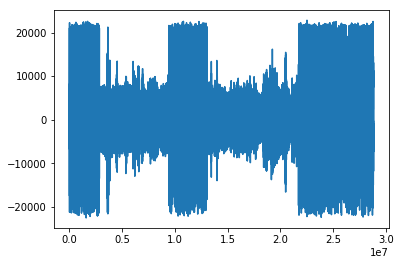

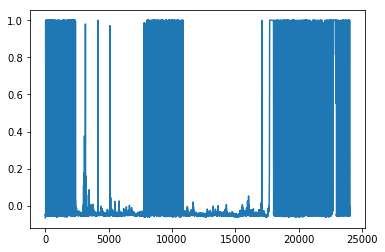

In [10]:
#Load model, predict, and plot

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM((1), return_sequences = False)
 
])
#compile model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
#load weights
model.load_weights('./weights/my_model')

prediction = model.predict(data)

#plt.plot(audio)
#plt.show()

plt.plot(prediction)
plt.show()

In [ ]:
#frequency test

prediction = model.predict(data)

#plt.plot(audio)
#plt.show()

plt.plot(prediction)
plt.show()